# Blackleg Spatial example

In [1]:
from blackleg_hydrothermal.sporacleEzy_model import sporacleEzy_FMP
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
import datetime
import matplotlib.animation as animation

from blackleg_hydrothermal.read_silo_cog_arrays import read_cog_arrays
from blackleg_hydrothermal.hydrothermal_model_2d import hydrothermal_FPM_cumulative
from blackleg_hydrothermal.sporacleEzy_model_2d import sporacleEzy_FPM_cumulative
from blackleg_hydrothermal.blackleg_sporacle_model_2d import blackleg_sporacle_FPM_cumulative

## Download weather grids from SILO

base instruction on data access here:
https://www.longpaddock.qld.gov.au/silo/gridded-data/
Idex of all available NetCDF products is available here:
https://s3-ap-southeast-2.amazonaws.com/silo-open-data/Official/annual/index.html

In [2]:

# SW WA
aoi = box(*Point(118.0, -31.2).buffer(4).bounds)


startdate = datetime.date(2023, 1, 1)
enddate = datetime.date(2023, 5, 28)

silo_grids = read_cog_arrays(startdate, enddate, aoi)
rainfall = silo_grids["daily_rain"]
tmax = silo_grids["max_temp"]
tmin = silo_grids["min_temp"]
evaporation = silo_grids["evap_pan"]

## Run three blackleg prediction models 

In [3]:
sporacleEzy_pm_cumsum = sporacleEzy_FPM_cumulative(rainfall, tmax, tmin)
sporacle_pm_cumsum = blackleg_sporacle_FPM_cumulative(rainfall, tmax, tmin)
hydrothermal_pm_cumsum = hydrothermal_FPM_cumulative(rainfall, tmax, tmin, evaporation)

results = {
    "sporacleEzy": sporacleEzy_pm_cumsum,
    "sporacle": sporacle_pm_cumsum,
    "hydrothermal": hydrothermal_pm_cumsum,
    }


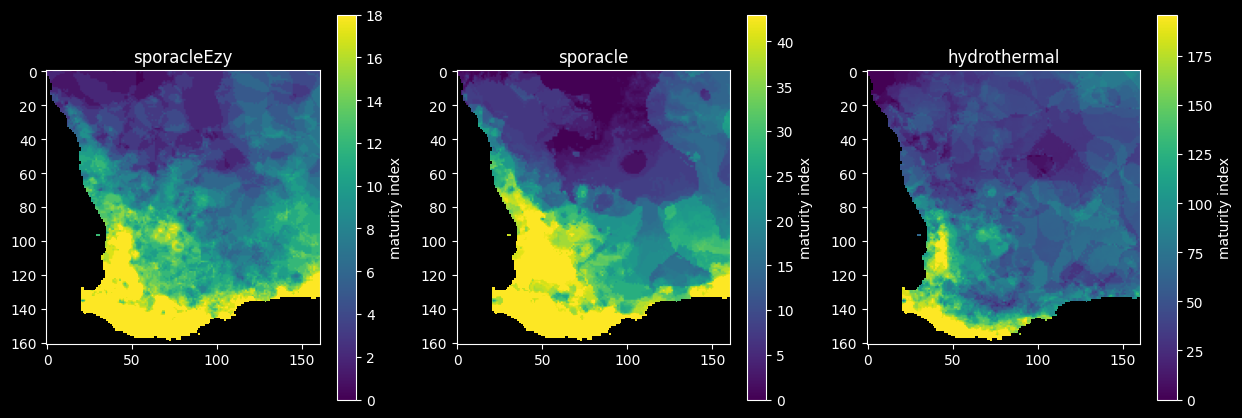

In [12]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
pm_thresholds = [18, 43, 196]

for ax, (model, pm_cumsum), pm_threshold in zip(axs, results.items(), pm_thresholds):
    cax = ax.imshow(pm_cumsum[-1], vmax=pm_threshold)
    fig.colorbar(cax, ax=ax, label='maturity index')
    ax.set_title(model)
